<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!unzip -n -q archive.zip

# 3. Εικόνες σε Numpy Arrays

In [40]:
import os, cv2, numpy as np
from sklearn.preprocessing import LabelBinarizer

X, labels = [], []

# Φόρτωση και Επεξεργασία όλων των εικόνων
for root, _, files in os.walk("."):
    for file in files:
        if file.endswith(".jpg"):
            path = os.path.join(root, file)
            img = cv2.imread(path)
            if img is not None:
                # Μετατροπή σε εικόνα 64x64
                img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (64, 64))
                X.append(img)
                labels.append(os.path.basename(root)) # Το όνομα του φακέλου είναι το label

# Μετατροπή σε numpy arrays και One-Hot Encoding
X = np.array(X)
y = LabelBinarizer().fit_transform(labels)

print(f"Images: {X.shape}, Targets: {y.shape}")

Images: (967, 64, 64, 3), Targets: (967, 10)


# 4. Δημιουργία Multi Layer Perceptron

In [41]:
import tensorflow as tf

# Διαστάσεις από τα δεδομένα
input_size = X.shape[1:]  # (64, 64, 3)
output_size = y.shape[1]  # Πλήθος ρατσών

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')

mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Εκπαίδευση μοντέλου

In [35]:
import tensorflow as tf

# Compile με τις ζητούμενες παραμέτρους
mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Εκπαίδευση (Fit)
# validation_split=0.2 για να δημιουργήσουμε το "test" set
history = mlp.fit(
    X, y,
    batch_size=32,
    epochs=30,
    validation_split=0.2
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.1413 - loss: 924.0568 - val_accuracy: 0.0000e+00 - val_loss: 3049.0945
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2115 - loss: 270.9672 - val_accuracy: 0.0000e+00 - val_loss: 2151.0989
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4723 - loss: 71.4219 - val_accuracy: 0.0000e+00 - val_loss: 1396.0040
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6197 - loss: 30.1390 - val_accuracy: 0.0000e+00 - val_loss: 1235.0945
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5464 - loss: 41.3082 - val_accuracy: 0.0000e+00 - val_loss: 812.7120
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5602 - loss: 50.3560 - val_accuracy: 0.0000e+00 - val_loss: 1095.0345
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6219 - loss: 52.1267 - val_accuracy: 0.0000e+00 - val_loss: 1074.8717
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

# 6. Διαγράμματα για Loss, Accuracy

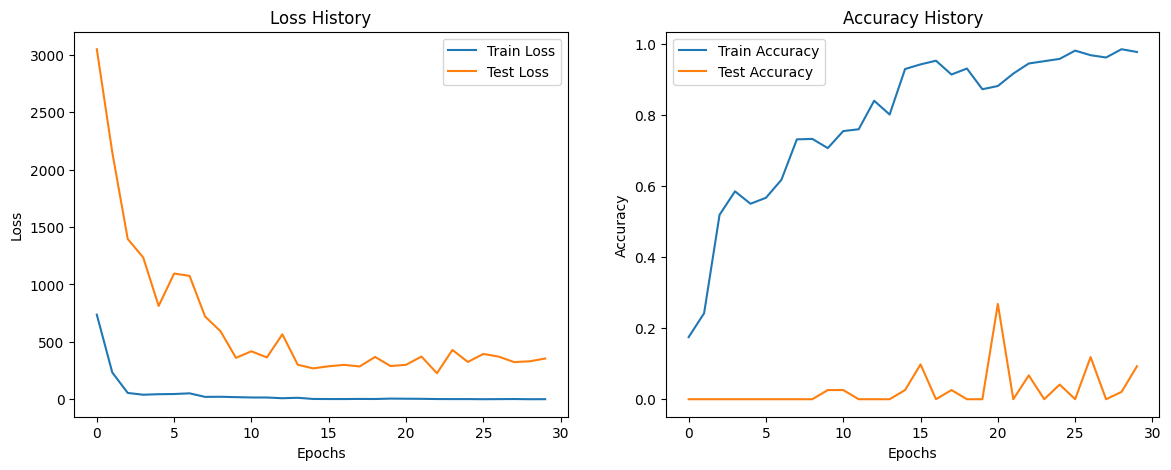

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Διάγραμμα Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Διάγραμμα Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 7. Εκπαίδευση CNN

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.1049 - loss: 140.1993 - val_accuracy: 0.4691 - val_loss: 1.8907
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5210 - loss: 1.4365 - val_accuracy: 0.9330 - val_loss: 0.3427
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9222 - loss: 0.2540 - val_accuracy: 0.9691 - val_loss: 0.1396
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9650 - loss: 0.1115 - val_accuracy: 1.0000 - val_loss: 0.0401
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 1.0000 - val_loss: 0.0433
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9841 - loss: 0.0396 - val_accuracy: 0.9948 - val_loss: 0.0161
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9897 - val_loss: 0.0851
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9792 - loss: 0.0600 - val_accuracy: 1.0000 - val_lo

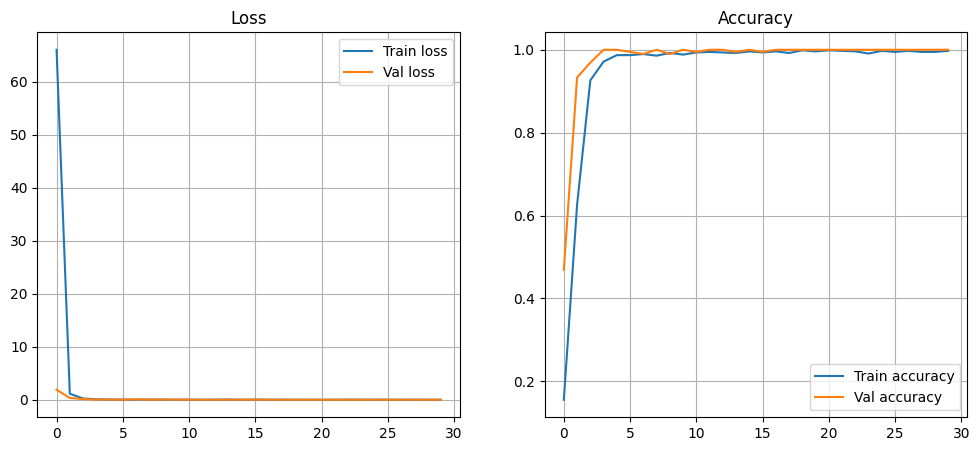

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Train & Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, 3, strides=2, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, strides=1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

# Compile & Fit
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

# Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss')
plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('Accuracy')
plt.legend(); plt.grid(True)
plt.show()

Στο MLP κάθε πίξελ και κανάλι θεωρείται ως μια ανεξάρτητη είσοδος όπως και οι διάφορες ομάδες από πίξελς. Οι διάφορες περιοχές των εικόνων δεν αναλύονται παραπάνω. Αντιθέτως στο CNN κάθε layer χρησιμοποιεί φίλτρα στις εισόδους ώστε να εξάγει χρήσιμα χαρακτηριστικά(feature maps) για πολλές περιοχές της εικόνας όπως σχήματα και χρώματα. Αυτά τα φίλτρα είναι νευρώνες που εκπαιδεύονται από το Neural Network.

# 8. Βελτιστοποίηση με Standard Scaling, Batch Normalization

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.1827 - loss: 4.3367 - val_accuracy: 0.2526 - val_loss: 2.2074
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7959 - loss: 0.9221 - val_accuracy: 0.3454 - val_loss: 1.9637
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9837 - loss: 0.1630 - val_accuracy: 0.7577 - val_loss: 1.6567
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9962 - loss: 0.0238 - val_accuracy: 0.9381 - val_loss: 1.4620
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9845 - val_loss: 1.2861
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9845 - val_loss: 1.1326
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9845 - val_loss: 0.9864
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9845 - va

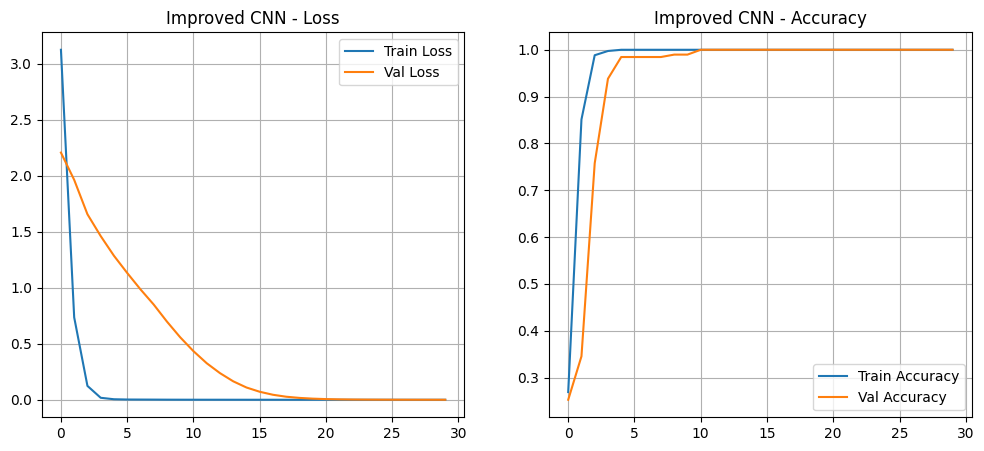

In [43]:
# Κανονικοποίηση (0-255 -> 0-1)
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Βελτιωμένο Μοντέλο
cnn_improved = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),

    tf.keras.layers.Conv2D(32, 3, strides=2, activation='relu'),
    tf.keras.layers.BatchNormalization(), # Προσθήκη για βελτίωση
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, 3, strides=1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

cnn_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_imp = cnn_improved.fit(x_train_norm, y_train, epochs=30, batch_size=32, validation_data=(x_test_norm, y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Διάγραμμα Loss
plt.subplot(1, 2, 1)
plt.plot(history_imp.history['loss'], label='Train Loss')
plt.plot(history_imp.history['val_loss'], label='Val Loss')
plt.title('Improved CNN - Loss')
plt.legend()
plt.grid(True)

# Διάγραμμα Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_imp.history['accuracy'], label='Train Accuracy')
plt.plot(history_imp.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved CNN - Accuracy')
plt.legend()
plt.grid(True)

plt.show()